In [2]:
import pandas as pd
import numpy as np
import matplotlib as matplot
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../data/hr-analytics/turnover.csv', index_col=None)

In [4]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df = df.rename(columns={'satisfaction_level':'satisfaction','last_eveluation':'evaluation',
                       'number_project':'projectCount','average_monthly_hours':'averageMonthlyHours',
                       'time_spend_company':'yearsAtCompany','Work_accident':'workAccident',
                       'promotion_last_5years':'promotion','sales':'department','left':'turnover'})

In [7]:
front = df['turnover']
df.drop(labels=['turnover'], axis=1, inplace=True)
df.insert(0,'turnover', front)
df.head()

,turnover,satisfaction,last_evaluation,projectCount,average_montly_hours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [8]:
df.shape

(14999, 10)

In [9]:
df.dtypes

turnover                  int64
satisfaction            float64
last_evaluation         float64
projectCount              int64
average_montly_hours      int64
yearsAtCompany            int64
workAccident              int64
promotion                 int64
department               object
salary                   object
dtype: object

In [10]:
turnover_rate = df.turnover.value_counts()/len(df)
turnover_rate


0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [11]:
df.describe()

,turnover,satisfaction,last_evaluation,projectCount,average_montly_hours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [12]:
turnover_summary = df.groupby('turnover')
print(turnover_summary)

In [13]:
print(turnover_summary.mean())

          satisfaction  last_evaluation  projectCount  average_montly_hours  \
turnover                                                                      
0             0.666810         0.715473      3.786664            199.060203   
1             0.440098         0.718113      3.855503            207.419210   

          yearsAtCompany  workAccident  promotion  
turnover                                           
0               3.380032      0.175009   0.026251  
1               3.876505      0.047326   0.005321  


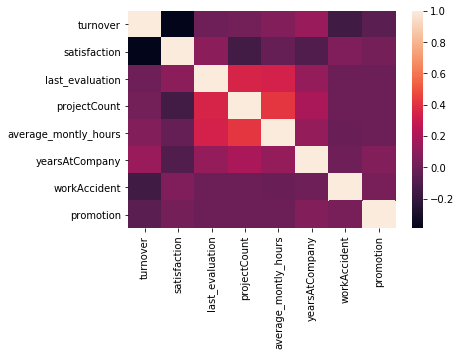

In [14]:
corr = df.corr()
corr=(corr)
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [15]:
# Hypothesis Testing: Is there significant difference in the means of satisfaction level between employees who had a turnover and temployees who had no turnover?

In [16]:
emp_population =df['satisfaction'][df['turnover']==0].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean satisfaction for the employee population with no turnover is: 0.666809590479516
The mean satisfaction for employees that had a turnover is: 0.44009801176140917


In [17]:
import scipy.stats as stats

stats.ttest_1samp(a=df[df['turnover']==1]['satisfaction'], popmean=emp_population)

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

In [18]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)
RQ= stats.t.ppf(0.975,degree_freedom)

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


Text(0, 0.5, 'Employee count')

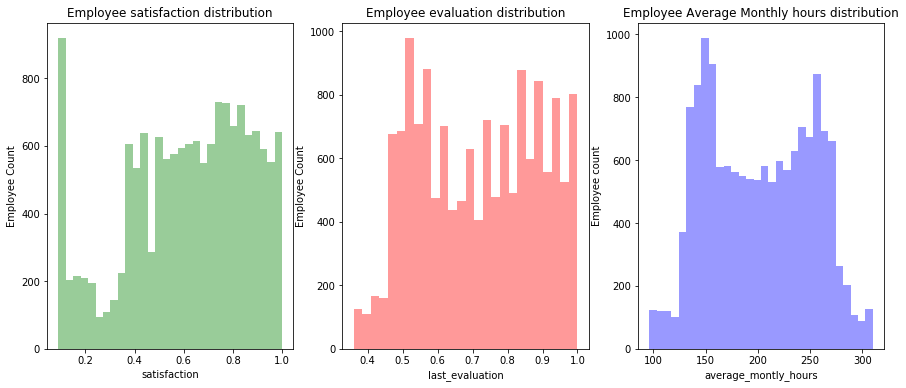

In [19]:
f, ax = plt.subplots(ncols=3, figsize=(15,6))

sns.distplot(df.satisfaction, kde=False, color='g', ax= ax[0]).set_title('Employee satisfaction distribution')
ax[0].set_ylabel('Employee Count')

sns.distplot(df.last_evaluation, kde=False, color='r', ax=ax[1]).set_title('Employee evaluation distribution')
ax[1].set_ylabel('Employee Count')

sns.distplot(df.average_montly_hours, kde=False, color='b', ax=ax[2]).set_title('Employee Average Monthly hours distribution')
ax[2].set_ylabel('Employee count')

In [20]:
df.head()

,turnover,satisfaction,last_evaluation,projectCount,average_montly_hours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


Text(0.5, 1.0, 'Employee Salary Turnover distribution')

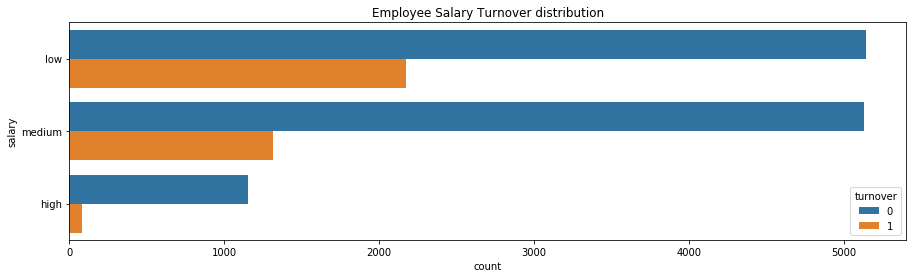

In [21]:
f,ax = plt.subplots(figsize=(15,4))
sns.countplot(y='salary', hue='turnover', data =df).set_title('Employee Salary Turnover distribution')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

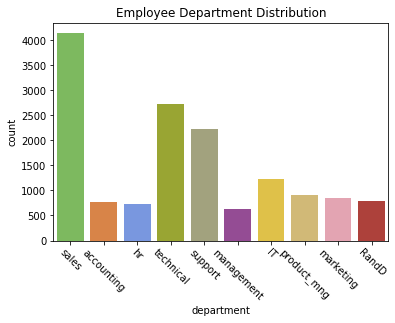

In [22]:
# Department vs Turnover

color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

sns.countplot(x='department', data = df, palette=color_types).set_title('Employee Department Distribution')

plt.xticks(rotation=-45)

Text(0.5, 1.0, 'Employee department turnover distribution')

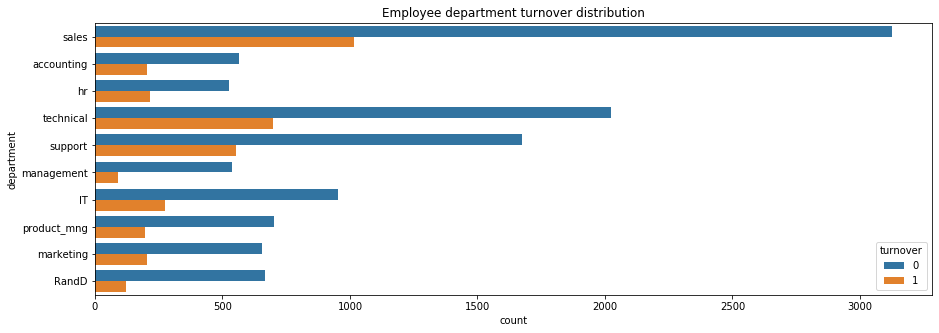

In [24]:
f, ax = plt.subplots(figsize=(15,5))
sns.countplot(y='department',hue='turnover', data=df).set_title('Employee department turnover distribution')

[Text(0, 0.5, 'percent')]

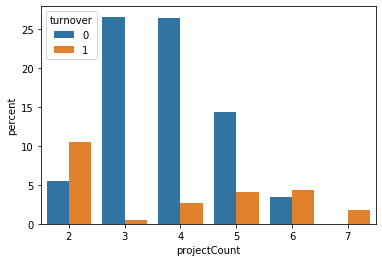

In [26]:
# turnover vs project count
ax = sns.barplot(x='projectCount',y='projectCount', hue='turnover', data=df, estimator=lambda x:len(x)*100/len(df))
ax.set(ylabel='percent')

Text(0.5, 1.0, 'Employee Evaluation distribution - turnover vs no turnover')

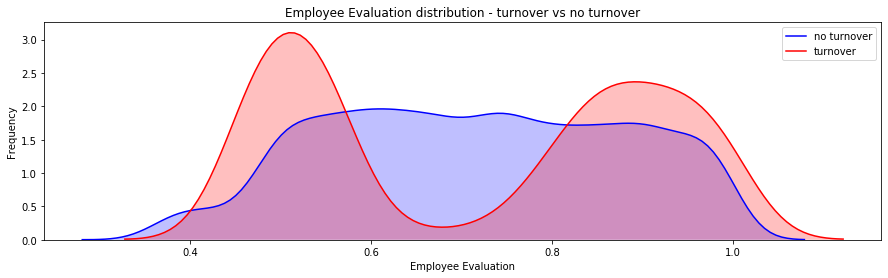

In [28]:
# Turnover vs evaluation

fig = plt.figure(figsize=(15,4))
ax = sns.kdeplot(df.loc[(df['turnover']==0),'last_evaluation'], color='b', shade=True, label='no turnover')
ax = sns.kdeplot(df.loc[(df['turnover']==1),'last_evaluation'], color ='r',shade=True,label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation distribution - turnover vs no turnover')

Text(0.5, 1.0, 'Employee average monthly hours distribution - turnover vs no turnover')

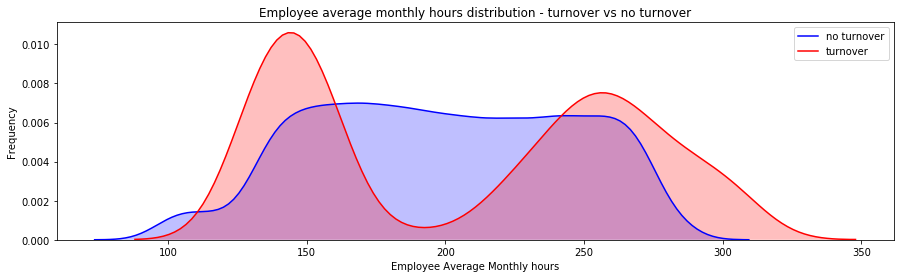

In [30]:
# Turnover vs monthlyhrs

fig = plt.figure(figsize=(15,4))
ax= sns.kdeplot(df.loc[(df['turnover']==0),'average_montly_hours'], color='b', shade=True, label='no turnover')
ax= sns.kdeplot(df.loc[(df['turnover']==1),'average_montly_hours'], color='r', shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly hours', ylabel='Frequency')
plt.title('Employee average monthly hours distribution - turnover vs no turnover')

Text(0.5, 1.0, 'Employee satisfaction distribution')

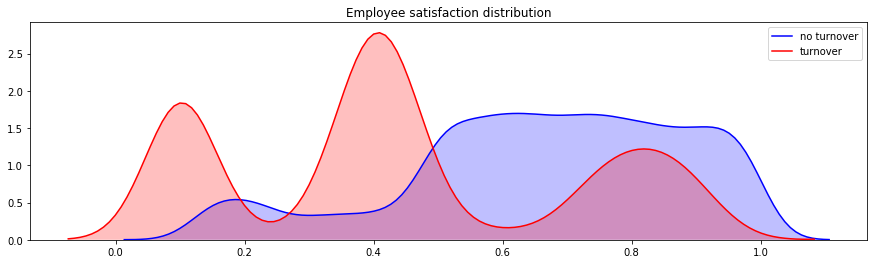

In [31]:
# turnover vs satisfaction

fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover']==0),'satisfaction'], color='b', shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover']==1),'satisfaction'], color='r', shade=True, label='turnover')
plt.title('Employee satisfaction distribution')

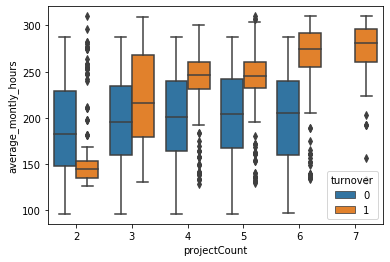

In [32]:
# project count vs monthly hours

sns.boxplot(x='projectCount', y='average_montly_hours', hue='turnover', data=df)

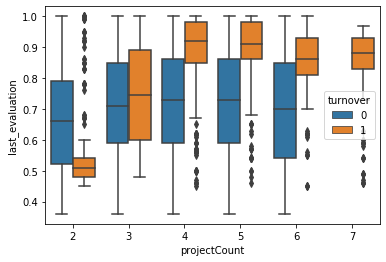

In [34]:
# projectcount vs evaluation
sns.boxplot(x='projectCount', y='last_evaluation', hue='turnover', data=df)

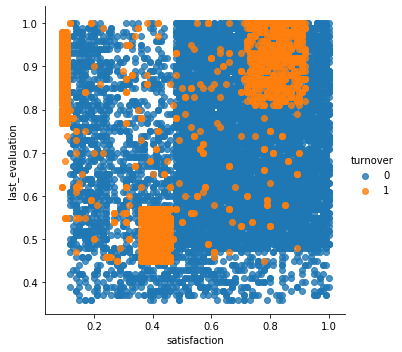

In [37]:
# satisfaction vs evaluation
sns.lmplot(x='satisfaction', y='last_evaluation', data=df, fit_reg=False, hue='turnover')

[Text(0, 0.5, 'Percent')]

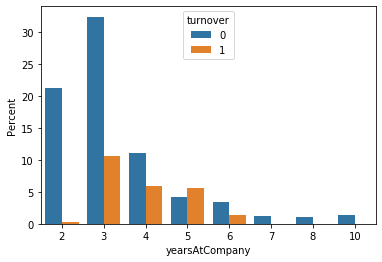

In [38]:
# Turnover vs years at company
ax=sns.barplot(x='yearsAtCompany', y='yearsAtCompany', hue='turnover', data=df, estimator = lambda x: len(x)/len(df)*100)
ax.set(ylabel='Percent')

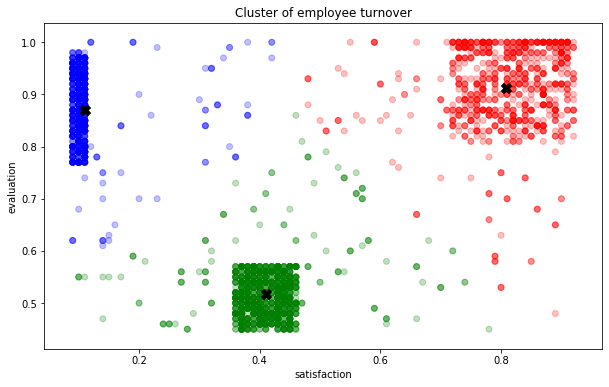

In [43]:
# K-Means Clustering of Employee Turnover

from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=3, random_state=2)
kmeans.fit(df[df.turnover==1][['satisfaction','last_evaluation']])
kmeans_colors =['green' if c ==0 else 'blue' if c==2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10,6))
plt.scatter(x='satisfaction', y='last_evaluation', data=df[df.turnover==1],alpha=.25, color=kmeans_colors)
plt.xlabel('satisfaction')
plt.ylabel('evaluation')
plt.scatter(x=kmeans.cluster_centers_[:,0],
           y=kmeans.cluster_centers_[:,1],
           color='black',
           marker="X",
           s=100)
plt.title('Cluster of employee turnover')
plt.show()

In [44]:
df.head()

,turnover,satisfaction,last_evaluation,projectCount,average_montly_hours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


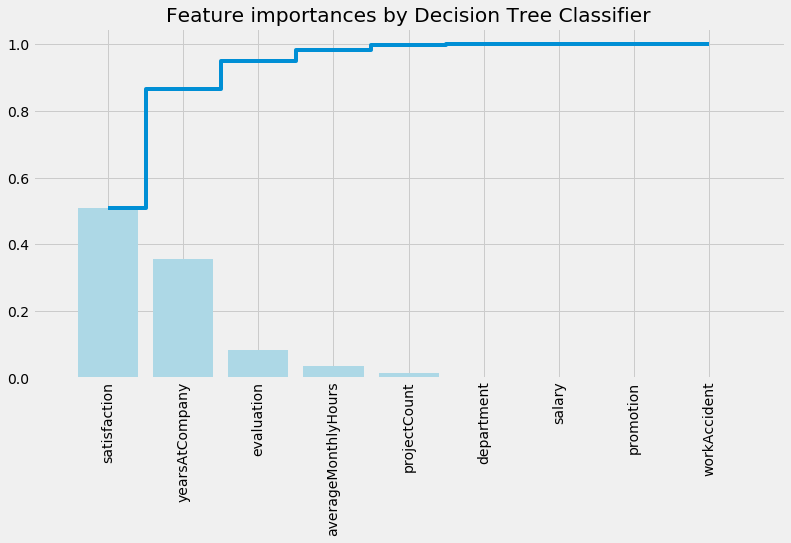

In [46]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(12,6)

df = df.rename(columns={'last_evaluation':'evaluation','average_montly_hours':'averageMonthlyHours'})

df['department']=df['department'].astype('category').cat.codes
df['salary']=df['salary'].astype('category').cat.codes

target_name = 'turnover'
X = df.drop('turnover',axis=1)

y = df[target_name]

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=.15, random_state=123,stratify=y)

dtree=DecisionTreeClassifier(class_weight='balanced',
                            min_weight_fraction_leaf=0.01)

dtree=dtree.fit(X_train,y_train)

importances= dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title('Feature importances by Decision Tree Classifier')
plt.bar(range(len(indices)), importances[indices], color='lightblue', align='center')
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid',label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=14)
plt.xlim([-1,len(indices)])
plt.show()

In [47]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [48]:
df['int'] = 1
indep_var=['satisfaction','evaluation','yearsAtCompany','int','turnover']
df=df[indep_var]

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()


,satisfaction,evaluation,yearsAtCompany,int
9003,0.59,1.00,3,1
5697,0.81,0.98,2,1
10691,1.00,0.93,2,1
1884,0.87,0.91,5,1
13572,0.87,0.48,3,1


In [49]:
import statsmodels.api as sm
iv = ['satisfaction','evaluation','yearsAtCompany','int']
logReg = sm.Logit(y_train,X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.467233
         Iterations 6


satisfaction     -3.769022
evaluation        0.207596
yearsAtCompany    0.170145
int               0.181896
dtype: float64

In [52]:
coef = answer.params

def y(coef, satisfaction, evaluation, yearsAtCompany):
    return coef[3] + coef[0]*satisfaction + coef[1]*evaluation +coef[2]*yearsAtCompany

y1= y(coef, 0.7, .8, 3)
p = np.exp(y1)/ (1+np.exp(y1))
p

0.1443146255973825

In [53]:
# base rate model
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [54]:
df.head()

,satisfaction,evaluation,yearsAtCompany,int,turnover
0,0.38,0.53,3,1,1
1,0.80,0.86,6,1,1
2,0.11,0.88,4,1,1
3,0.72,0.87,5,1,1
4,0.37,0.52,3,1,1


In [55]:
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score

print("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [57]:
model = LogisticRegression(penalty = 'l2', C=1)
model.fit(X_train, y_train)
print("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.77


In [59]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight="balanced")
scoring ='roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv = kfold, scoring = scoring)
print("AUc : %.3f (%.3f)" % (results.mean(),results.std()))

C:\Users\mushirih\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AUc : 0.793 (0.014)


In [63]:
from sklearn.metrics import roc_auc_score,classification_report

from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



print("====Base Model ====")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print("Base rate auc = %2.2f"% base_roc_auc)

print(classification_report(y_test, base_rate_model(X_test)))

logis = LogisticRegression(class_weight="balanced")
logis.fit(X_train, y_train)
print("\n\n ====Logistic Model====")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

dtree = tree.DecisionTreeClassifier(
class_weight='balanced',
min_weight_fraction_leaf=.01
)

dtree = dtree.fit(X_train, y_train)
print("\n\n====Decision Tree Model====")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print("Decision Tree AUC = %2.2f"% dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))


rf = RandomForestClassifier(n_estimators=1000,
                           max_depth=None,
                           min_samples_split=10,
                           class_weight='balanced')

rf.fit(X_train, y_train)
print("\n\n ====Random Forest Model====")
rf_roc_auc= roc_auc_score(y_test, rf.predict(X_test))
print("Random Forest AUC= %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))

ada = AdaBoostClassifier(n_estimators = 400, learning_rate =0.1)
ada.fit(X_train, y_train)
print("\n\n====AdaBoost Model====")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test,ada.predict(X_test)))

====Base Model ====
Base rate auc = 0.50
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1714
           1       0.00      0.00      0.00       536

    accuracy                           0.76      2250
   macro avg       0.38      0.50      0.43      2250
weighted avg       0.58      0.76      0.66      2250



 ====Logistic Model====
Logistic AUC = 0.74
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1714
           1       0.48      0.73      0.58       536

    accuracy                           0.75      2250
   macro avg       0.69      0.74      0.70      2250
weighted avg       0.80      0.75      0.76      2250



====Decision Tree Model====
Decision Tree AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1714
           1       0.87      0.91      0.89       536

    accuracy                           0

C:\Users\mushirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ====Random Forest Model====
Random Forest AUC= 0.97
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1714
           1       0.95      0.96      0.95       536

    accuracy                           0.98      2250
   macro avg       0.97      0.97      0.97      2250
weighted avg       0.98      0.98      0.98      2250



====AdaBoost Model====
AdaBoost AUC = 0.90
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1714
           1       0.90      0.82      0.86       536

    accuracy                           0.94      2250
   macro avg       0.92      0.90      0.91      2250
weighted avg       0.93      0.94      0.93      2250



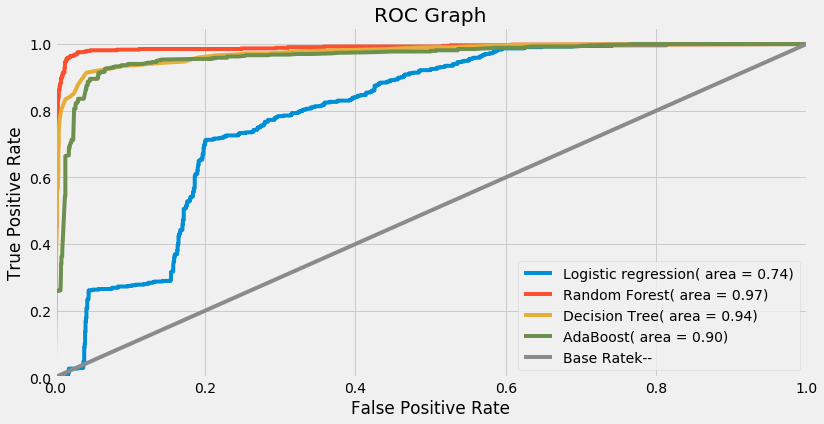

In [65]:
# ROC graph

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds=roc_curve(y_test,rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label="Logistic regression( area = %0.2f)"%logit_roc_auc)

plt.plot(rf_fpr,rf_tpr,label="Random Forest( area = %0.2f)"%rf_roc_auc)

plt.plot(dt_fpr,dt_tpr,label="Decision Tree( area = %0.2f)"%dt_roc_auc)

plt.plot(ada_fpr,ada_tpr,label="AdaBoost( area = %0.2f)"%ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()